# HW2: Plotting & viz

due Tuesday Feb 8, 2021 @ 8pm

**submission instructions:**
make a new directory in your HW github repo
(e.g., `<yourname>_hw_2/`)

In [1]:
import pandas as pd
import numpy as np

#%matplotlib notebook
%matplotlib inline

## Critique the most important figure from a seminal paper in your field

a) Embed (using `<img src= ...`) the original figure/caption along with a link to the original work. 

b) In your own words, what story is this figure trying to convey? What does it do well? What could have been done better? What elements didn't need to be present to still convey the same story?

## Reproduce one of your old published-paper quality plots with Bokeh or matplotlib.

a) Provide the original plot, the recreated Bokeh/matlibplot plot, and the Python code used to make the new plot.  You can ask us for an example from us if you don't have your own plots.

### Original plot: here's a plot I used to examine data from my research group's 2016 balloon flight. We were searching for the signature of Galactic \$^{26}\$Al, which emits a 1809 keV \$\gamma\$-ray upon decay. The signal region is the Inner Galaxy, where \$^{26}\$Al is concentrated, and the background region is everywhere exclusive of the Inner Galaxy.

<img src="full_flight_spectrum_ay250_hw2.jpg" width="800" />

In [10]:
#![spectrum](full_flight_spectrum_ay250_hw2.jpg)

In [6]:
from bokeh.io import show, output_notebook, output_file
from bokeh.layouts import row, column
from bokeh.plotting import figure
from bokeh.models import Arrow, OpenHead, Range1d, CustomJS
from bokeh.models.widgets import CheckboxGroup

In [3]:
df = pd.read_csv('full_flight_spectrum_ay250_hw2.txt',sep=' ',
                names=['energy', 'total', 'on_spec', 'off_spec', 
                      'total_err', 'on_spec_err', 'off_spec_err',
                      'diff', 'diff_err'])

In [8]:
output_notebook()

TOOLS = "hover, crosshair, pan, box_zoom, undo, redo, reset, save"


# show total, signal, and background region spectra
p1 = figure(tools=TOOLS, toolbar_location="right", plot_width=800, plot_height=300, y_axis_type="log")

p1.yaxis.axis_label = r"\[\mathrm{cnts } \mathrm{s}^{-1} \mathrm{keV}^{-1}\]"
p1.y_range = Range1d(10**-6, 2*10**-2)

total = p1.line(df['energy'], df['total'], line_width=2, line_color='blue', legend_label='Signal + Background')
signal = p1.line(df['energy'], df['on_spec'], line_width=2, line_color='green', legend_label='Signal Region')
bg = p1.line(df['energy'], df['off_spec'], line_width=2, line_color='black', legend_label='Background Region')


# add checkboxes to control which spectra are shown
checkboxes = CheckboxGroup(labels=["Signal + Background", "Signal", "Background"])
callback = CustomJS(code="""total.visible = false; 
                            signal.visible = false;
                            bg.visible = false;

                            if (cb_obj.active.includes(0)) {
                                total.visible = true;
                            } 
                            if (cb_obj.active.includes(1)) {
                                signal.visible = true;
                            }
                            if (cb_obj.active.includes(2)) { 
                                bg.visible = true;
                            }
                        """,
                    args={'total': total, 'signal': signal, 'bg': bg})
checkboxes.js_on_click(callback)


# put residual plot below
p2 = figure(tools=TOOLS, toolbar_location="right", plot_width=800, plot_height=300, y_axis_type="log")

p2.xaxis.axis_label = 'Energy [keV]'
p2.yaxis.axis_label = r"\[\mathrm{cnts } \mathrm{s}^{-1} \mathrm{keV}^{-1}\]"
p2.y_range = Range1d(10**-6, 2*10**-3)

residual = p2.line(df['energy'], df['diff'], line_width=2, line_color='black', legend_label='Signal - Background')

p2.add_layout(Arrow(end=OpenHead(line_color="red", line_width=5),
                   x_start=1809, y_start=10**-3, x_end=1809, y_end=10**-4))

# output to html
#output_file("interactive_flight_spectra.html")

# show them all together
show(column(row(p1, checkboxes), p2))

Loading BokehJS ...

b) Add some (new) dynamic interactions to the plot--does it help tell your story better?

### Answer: I couldn't quite get this to work as I wanted to (all of the spectra appear initially, which is what I wanted, but then all of the checkboxes should also be clicked "on" initially, which they're not). I do like the zoom feature when looking at the spectra and it is nice being able to view only a subset of the three spectra in the top panel. Overall, I probably need more experience with bokeh to properly exploit all of its capabilities. The zoom feature is achievable with %matplotlib notebook, for example. I'm also not sure how to properly show error bars in bokeh, while in matplotlib I could simply call plt.errorbar(...).

##  Volcano-induced Blastwave moving through California in 2022

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Shockwave_from_Hunga_Tonga_GOES_17.gif/440px-Shockwave_from_Hunga_Tonga_GOES_17.gif" width="30%">

The massive volcanic eruption near Tonga in the Pacific Ocean (20.550°S 175.385°W) occurred at 04:14:45 [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) on 15 January 2022. The above animation (credit: Tim Schmit, NOAA/NESDIS/ASPB) shows propogation of the shockwave across the Earth as seen from space (using infrared measurements of water vapor). That shockwave was also measured as changing pressure in weather stations around the world. 

a) The CSV file `data/california_pressure_2022_01_15.csv` contains [Automated Surface Observing System (ASOS)](https://mesonet.agron.iastate.edu/ASOS/) pressure measurements at 64 stations in California taken several hours later that day, observed with 1-minute resolution. Read this data into a `pandas` DataFrame and then plot in the same figure the pressure as a function of time at SBA (Santa Barbara Municipal Airport, in Southern California), OAK (Oakland Airport, Bay Area), and MHS (Mount Shasta City, in Northern California). To allow a better visual comparison between the three, divide each plot by the initial value at the start of each of the timeseries. Overplot a 5-min thick vertical line for each timeseries (with the same color as the line) at the maximum of that series.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from datetime import datetime

In [42]:
df = pd.read_csv("data/california_pressure_2022_01_15.csv")#,parse_dates=["valid(UTC)"])

In [43]:
df.head()

,valid(UTC),ACV,BFL,DAG,BIH,BLU,BLH,BUR,CMA,CRQ,...,SMX,SMO,STS,TVL,SCK,TRM,UKI,VCB,VNY,WVI
0,2022-01-15 09:00:00,29.970,29.653,28.226,26.172,24.978,29.744,29.327,30.020,29.730,...,29.842,29.894,30.050,24.090,30.195,30.287,29.536,30.115,29.241,30.002
1,2022-01-15 09:01:00,29.969,29.654,28.226,26.172,24.978,29.743,29.328,30.020,29.730,...,29.842,29.894,30.050,24.090,30.197,30.287,29.536,30.116,29.241,30.002
2,2022-01-15 09:02:00,29.969,29.654,28.227,26.172,24.978,29.743,29.328,30.021,29.731,...,29.842,29.894,30.050,24.091,30.197,30.287,29.535,30.117,29.240,30.002
3,2022-01-15 09:03:00,29.969,29.654,28.227,26.175,24.977,29.744,29.327,30.020,29.730,...,29.842,29.894,30.051,24.091,30.195,30.288,29.535,30.117,29.240,30.002
4,2022-01-15 09:04:00,29.969,29.655,28.228,26.174,24.977,29.745,29.327,30.019,29.731,...,29.841,29.894,30.049,24.090,30.195,30.288,29.534,30.118,29.240,30.002


In [44]:
SBA = df["SBA"] / df["SBA"][0]
OAK = df["OAK"] / df["OAK"][0]
MHS = df["MHS"] / df["MHS"][0]

print(f"SBA type: {SBA.dtype}, OAK type: {OAK.dtype}, MHS type: {MHS.dtype}")

SBA type: float64, OAK type: float64, MHS type: float64


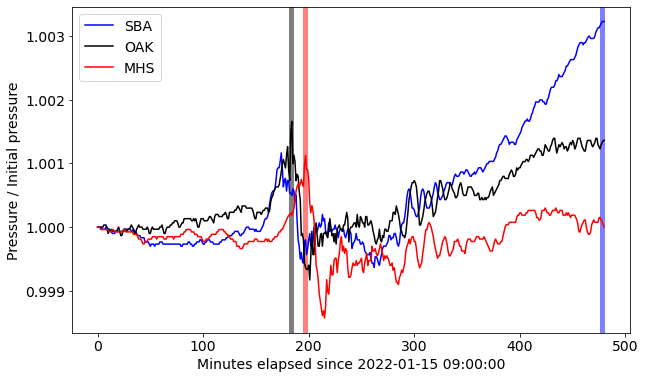

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
time = np.arange(df.index.stop)

color = ['b', 'k', 'r']
ax.plot(time, SBA, label="SBA", c=color[0])
ax.plot(time, OAK, label="OAK", c=color[1])
ax.plot(time, MHS, label="MHS", c=color[2])

# overplot vertical line at maximum of each series
SBA_max_time = time[np.argmax(SBA)]
ax.axvspan(SBA_max_time - 2.5, SBA_max_time + 2.5, color=color[0], alpha=.5, lw=0)

OAK_max_time = time[np.argmax(OAK)]
ax.axvspan(OAK_max_time - 2.5, OAK_max_time + 2.5, color=color[1], alpha=.5, lw=0)

MHS_max_time = time[np.argmax(MHS)]
ax.axvspan(MHS_max_time - 2.5, MHS_max_time + 2.5, color=color[2], alpha=.5, lw=0)

# label, legend parameters
ax.set_xlabel("Minutes elapsed since {}".format(df["valid(UTC)"][0]), fontsize=14)
ax.set_ylabel("Pressure / Initial pressure", fontsize=14)
ax.tick_params(axis="both",labelsize=14)
plt.legend(loc="best",fontsize=14);

b) What can you say about the similarity or dissimilarity of the three series? Why argument can you make that the similarities are due to the Tongan shockwave and not other effects? What do you notice about the location of the maximum of the three series?

### Answer: All three locations show a strong increase in pressure ~180 minutes after first recorded data point. Note that MHS's increase is a bit delayed past that point to ~200 minutes after, but it seems likely that all of these peaks are due to the Tongan shockwave because the rates of their respective increases and decreases are very similar. Also note that the slight displacement of the peaks from each other is not unexpected. Although all three locations are close to each other (relative to the distance traversed by the shockwave), the speed of sound is not *that* fast on the time scale of minutes and these locations are far enough away from each other to record the shockwave at noticeably different times. 

### A major difference between the three locations is that although all experience a gradual increase in pressure after dropping after the shockwave, the pressure at SBA increases so dramatically that it exceeds the pressure of the initial shockwave.

### OAK increases more than MHS, as well. It is interesting, then, that lower latitude locations saw greater pressure increases after the shockwave. Could there be an affect from volcanic ash itself, which might reach SBA first since it's closer to Tonga than the other two stations? Volcanic ash might increase air density. 

### I would consider the elevation of the stations, but OAK and SBA are probably at comparable elevations and even though MHS is at high elevation, all of the pressures here are normalized to the initial pressure, indicating a change from baseline conditions. So, it must not be that. 

c) On a map of California, create a static vizualization of the timelag of the passage of the shockwave through the 64 stations in California. You might find it helpful to detect significant changes at each station using rolling percent changes on ~5-10 minute intervals (cf. [`.pct_change(periods=...)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) in pandas). The file `data/ca_asos.csv` contains the latitude and longitude of the stations. 

In [46]:
df_2 = pd.read_csv('data/ca_asos.csv',usecols=['stid', 'lat', 'lon'])

In [47]:
df_2.head(5)

,stid,lat,lon
0,AAT,41.49139,-120.56444
1,ACV,40.97811,-124.10861
2,AUN,38.95481,-121.08172
3,AVX,33.40500,-118.41583
4,BFL,35.43440,-119.05420


In [48]:
# create dictionary of stations and lat, lon
stations = np.array(df_2['stid'])
lat = np.array(df_2['lat'])
lon = np.array(df_2['lon'])

d = {}

for i in range(len(stations)):
    station = stations[i]
    d[station] = (lat[i], lon[i])

In [66]:
# computes percent change from immediately previous row, by default
# select the columns containing pressures from the first data fram
#  and set the period to 5 rows for finding the percent change over the
#  previous 5 minute interval --> first five rows are NaN

interval = 5 # minutes

pct_change_df = df.iloc[:,1:].pct_change(periods=interval)
pct_change_df.head(10)

,ACV,BFL,DAG,BIH,BLU,BLH,BUR,CMA,CRQ,NID,...,SMX,SMO,STS,TVL,SCK,TRM,UKI,VCB,VNY,WVI
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.000033,0.000067,0.000106,0.000076,0.00000,0.000034,-0.000034,0.000000,0.000034,-0.000036,...,-0.000034,0.000000,-0.000033,-0.000042,0.000033,0.000033,-0.000068,0.000100,-0.000034,-0.000067
6,0.000000,0.000000,0.000071,0.000076,0.00000,0.000101,-0.000068,0.000000,0.000034,-0.000036,...,-0.000034,0.000033,0.000067,-0.000042,-0.000066,0.000066,-0.000102,0.000066,-0.000034,-0.000067
7,0.000000,-0.000034,0.000035,0.000000,0.00004,0.000134,-0.000034,-0.000033,0.000000,-0.000072,...,-0.000067,0.000067,0.000100,-0.000083,-0.000099,0.000066,-0.000068,0.000033,0.000034,-0.000067
8,0.000000,-0.000034,0.000000,-0.000191,0.00008,0.000101,0.000000,0.000000,0.000034,-0.000072,...,-0.000067,0.000067,0.000033,-0.000042,0.000000,0.000033,-0.000068,0.000033,0.000068,-0.000067
9,0.000000,0.000000,-0.000035,-0.000115,0.00008,0.000067,0.000034,0.000033,0.000034,-0.000072,...,-0.000067,0.000100,0.000100,0.000000,0.000033,0.000066,0.000000,-0.000033,0.000068,-0.000067


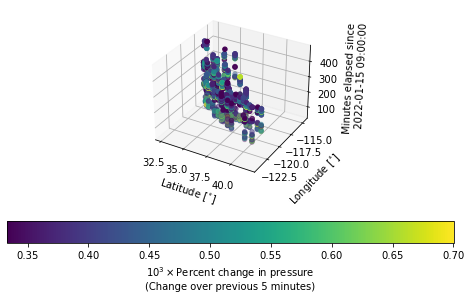

In [50]:
f, ax = plt.subplots(figsize=(8,4), subplot_kw={'projection': '3d'})
f.subplots_adjust(top=1.)

num_largest_changes = 25

color_map = plt.get_cmap('viridis')

for key in d:#["ACV","OAK"]:
    if key in list(df):

        percent_changes = pct_change_df[key].nlargest(n=num_largest_changes) * 1E3
        time_of_change = percent_changes.index
        
        plot = ax.scatter3D(d[key][0], d[key][1], time_of_change,
                     c = percent_changes,
                    cmap = color_map)

plt.colorbar(plot, location='bottom', orientation='horizontal', 
             label=r'10${^3} \times$Percent change in pressure'+'\n'+
             f'(Change over previous {interval} minutes)')

ax.set_xlabel(r'Latitude [$^{\circ}$]')
ax.set_ylabel(r'Longitude [$^{\circ}$]')
ax.yaxis.labelpad=10
ax.set_zlabel("Minutes elapsed since \n {}".format(df["valid(UTC)"][0]))
ax.zaxis.labelpad=8


In [51]:
# try to get a contour or surface plot

In [52]:
#stations = list(d.keys())

In [53]:
# # Create X, Y and Z arrays
# x = range(0,len(d.keys()))
# y = range(0,len(d.keys()))
# X, Y = np.meshgrid(x, y)
# Z = np.zeros((len(d.keys()),len(d.keys())))

# # Locations of the spikes. These are some made up numbers. 
# dataX = np.array([x[0] for x in list(d.values())])
# dataY = np.array([x[1] for x in list(d.values())])

# num_largest_changes = 1
                 
# # Set spikes to 100  
# #Z[dataX, dataY] = 100
# for i in range(len(x)):
#     for j in range(len(y)):
#         key = stations[i]
    
#         if key in df:
            
#             percent_change = pct_change_df[key].nlargest(n=num_largest_changes) * 1E3
#             time_of_change = percent_change.index
            
#             #percent_changes[i][j] = percent_change.values
#             #times_of_change[i][j] = np.array(time_of_change)

#             Z[i, j] = time_of_change
                 
# # Plot
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1, projection='3d')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.plot_surface(X, Y, Z)
# plt.show()

d) Pick one station and determine when you believe the shockwave first passed through that station. Using this information and the time of the explosion determine the speed of the shockwave. How does this compare to the speed of sound in air?

In [54]:
max_time_idx = pct_change_df.loc[pct_change_df["OAK"] == pct_change_df["OAK"].max()].index[0]
max_time_idx

206

In [55]:
t0 = datetime(2022, 1, 15, 4, 15, 45)
tmax = datetime.strptime(df["valid(UTC)"][max_time_idx], "%Y-%m-%d %H:%M:%S")
print(t0)
print(tmax)

2022-01-15 04:15:45
2022-01-15 12:26:00


In [56]:
delta_t = tmax - t0

# convert to float in seconds
delta_t = delta_t.total_seconds()

In [57]:
x0 = (-20.550, -175.385) # 20.550° S, 175.385° W
x = d["OAK"]

In [58]:
from scipy.constants import speed_of_sound
from astropy.constants import R_earth # in meters
from haversine import haversine, Unit # https://pypi.org/project/haversine/

In [59]:
distance = haversine(x, x0, unit='m')

In [60]:
speed = distance / delta_t
speed

290.1140165305739

In [61]:
speed_of_sound

340.5

In [62]:
np.abs(speed - speed_of_sound)/speed_of_sound

0.14797645659155975

### Answer: Pretty close to speed of sound in air! We incur some error because we're finding  percent changes over a given time interval on the order of minutes. At a 5 minute look-back time, we see ~50 m/s difference, or ~14.8% error.  At a 1 minute look-back time, we see ~36 m/s difference, or ~10.6% error.  We don't have data with finer timing resolution than ~1 minute, so perhaps 10.6% isn't a bad systematic error. 

**EXTRA CREDIT**  Produce an animation of passage of the shockwave through California using this dataset. Hint: take at look at `matplotlib.animation.FuncAnimation`.